In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import sklearn


In [3]:
# Data 100 Final Project 
# Authors: Zeyuan Cao, Ziang Gao, Julie Liu

In [5]:
states = pd.read_csv('4.18states.csv')
states.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


prune 4.18states to exclude information we do not need and large anormalies.

In [6]:
states.rename(columns={'Province_State':'State'}, inplace=True)
states_pruned = (states.iloc[:58, :].drop([2, 9, 13, 14, 36, 39, 44, 52]).drop(['Last_Update', 'Country_Region', 'Recovered', 'FIPS', 'UID', 'ISO3'], axis = 1).groupby('State').sum())
states_pruned.head(5)

,Lat,Long_,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
State,,,,,,,,,,,
Alabama,32.3182,-86.9023,4712,153,4559.0,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
Alaska,61.3707,-152.4044,314,9,305.0,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
Arizona,33.7298,-111.4312,4724,180,4544.0,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
Arkansas,34.9697,-92.3731,1744,38,1706.0,67.361213,24141.0,291.0,2.178899,932.435235,16.685780
California,36.1162,-119.6816,30491,1140,29351.0,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079


  New York acts as a big anormally in the sample so I excluded it in data pruning. The following diagrams explore correlation within pruned 4.18states table.

(0.18059442543483725, 0.007501857225283386)

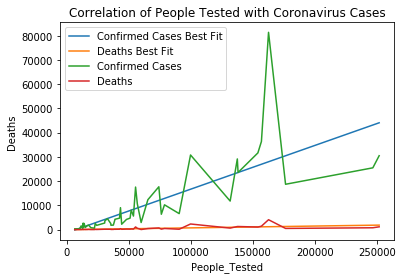

In [7]:
from scipy import stats
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['People_Tested'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['People_Tested'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['People_Tested'], y = slope_Confirmed * states_pruned['People_Tested'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['People_Tested'], y = slope_Deaths * states_pruned['People_Tested'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['People_Tested'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['People_Tested'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of People Tested with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(8.252770975374938, 0.388494666925704)

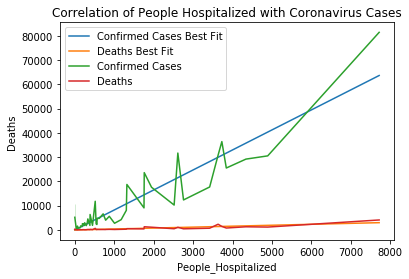

In [7]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['People_Hospitalized'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['People_Hospitalized'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['People_Hospitalized'], y = slope_Confirmed * states_pruned['People_Hospitalized'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['People_Hospitalized'], y = slope_Deaths * states_pruned['People_Hospitalized'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['People_Hospitalized'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['People_Hospitalized'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of People Hospitalized with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-202.32470096445735, -9.486745431051466)

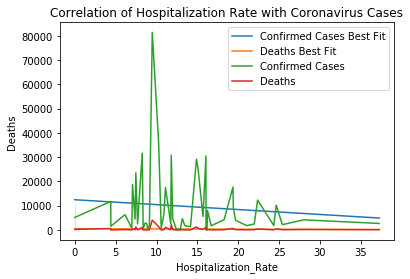

In [8]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['Hospitalization_Rate'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['Hospitalization_Rate'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['Hospitalization_Rate'], y = slope_Confirmed * states_pruned['Hospitalization_Rate'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['Hospitalization_Rate'], y = slope_Deaths * states_pruned['Hospitalization_Rate'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['Hospitalization_Rate'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['Hospitalization_Rate'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of Hospitalization Rate with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(3.42943885833013, 0.20742026958089912)

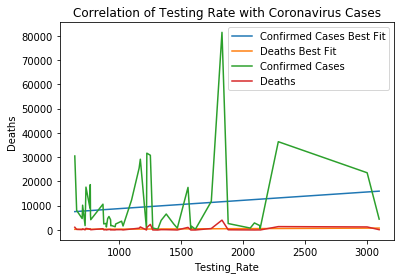

In [9]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['Testing_Rate'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['Testing_Rate'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['Testing_Rate'], y = slope_Confirmed * states_pruned['Testing_Rate'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['Testing_Rate'], y = slope_Deaths * states_pruned['Testing_Rate'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['Testing_Rate'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['Testing_Rate'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of Testing Rate with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(66.18690454345993, 3.4598520005250006)

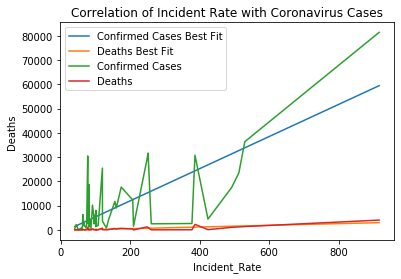

In [10]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['Incident_Rate'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['Incident_Rate'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['Incident_Rate'], y = slope_Confirmed * states_pruned['Incident_Rate'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['Incident_Rate'], y = slope_Deaths * states_pruned['Incident_Rate'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['Incident_Rate'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['Incident_Rate'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of Incident Rate with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-256.36264047603294, -4.2019462660740405)

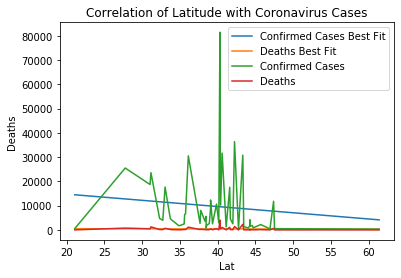

In [11]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(states_pruned['Lat'], states_pruned['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(states_pruned['Lat'], states_pruned['Deaths'])
sns.lineplot(x = states_pruned['Lat'], y = slope_Confirmed * states_pruned['Lat'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = states_pruned['Lat'], y = slope_Deaths * states_pruned['Lat'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = states_pruned['Lat'], y = states_pruned['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = states_pruned['Lat'], y = states_pruned['Deaths'], label = 'Deaths')
plt.title("Correlation of Latitude with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

import and trim and trim data in abridged_couties (typo in the titile)

In [8]:
counties = pd.read_csv('abridged_couties.csv')
counties.head(5)

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [9]:
counties.rename(columns={'Province_State':'State'}, inplace = True)
is_ny =  counties['State'] != 'New York'
counties = counties[is_ny]
counties_pruned = (counties.iloc[:3241, np.r_[5:30, 33]].drop(['CensusRegionName', 'CensusDivisionName', 'Rural-UrbanContinuumCode2013', 'CensusPopulation2010', 'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17'], axis = 1).groupby('State').sum())
counties_pruned_mean = (counties.iloc[:3241, np.r_[5:30, 33]].drop(['CensusRegionName', 'CensusDivisionName', 'Rural-UrbanContinuumCode2013', 'CensusPopulation2010', 'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17'], axis = 1).groupby('State').mean())
counties_pruned.head(5)

,lat,lon,POP_LATITUDE,POP_LONGITUDE,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,#ICU_beds
State,,,,,,,,,,,,,,,,,,,
Alabama,2203.491648,-5809.523075,2202.847785,-5808.962671,4887871.0,2359836.0,2514911.0,32.618674,803771.0,6044.5,2636.9,1080141.0,965.3,16320.9,3447.2,1339.278504,5177.96,88369.0,1533.0
Arizona,505.175270,-1672.005326,503.716457,-1672.168700,7171646.0,3488301.0,3527969.0,7.550242,1201746.0,780.7,579.8,1346727.0,150.9,2232.4,463.5,247.258666,779.53,98442.0,1559.0
Arkansas,2618.337238,-6932.819154,2619.302009,-6932.102170,3013825.0,1476064.0,1528215.0,37.115582,499144.0,4076.8,3023.7,670352.0,1007.4,17637.9,3576.1,1529.163651,5454.53,58025.0,732.0
California,2195.388719,-7002.010076,2193.636548,-7009.759026,39557045.0,19647553.0,19889100.0,29.284783,5505358.0,38468.8,2233.2,6466995.0,493.3,8926.7,2197.7,701.312786,3024.91,551825.0,7338.0
Colorado,2491.738210,-6751.228336,2492.574873,-6750.211067,5695564.0,2822333.0,2784821.0,33.231605,772042.0,9337.9,2641.0,965047.0,393.6,8341.6,2102.5,915.039844,3906.76,82584.0,1095.0


Result table that merges data from 4.18state and abridged counties and use sum to calculate value of states. Some data, like total population, should be taken as sum for each state, where as others, like smokers percentage, is better off taking average.

In [10]:
result = pd.merge(states_pruned, counties_pruned, on= 'State').iloc[:, 2:]
result.head(5)

,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,lat,...,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,#ICU_beds
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4712,153,4559.0,100.492717,42538.0,620.0,3.247029,907.206961,13.157895,2203.491648,...,6044.5,2636.9,1080141.0,965.3,16320.9,3447.2,1339.278504,5177.96,88369.0,1533.0
Arizona,4724,180,4544.0,64.901548,51045.0,566.0,3.810330,701.291175,11.981372,505.175270,...,780.7,579.8,1346727.0,150.9,2232.4,463.5,247.258666,779.53,98442.0,1559.0
Arkansas,1744,38,1706.0,67.361213,24141.0,291.0,2.178899,932.435235,16.685780,2618.337238,...,4076.8,3023.7,670352.0,1007.4,17637.9,3576.1,1529.163651,5454.53,58025.0,732.0
California,30491,1140,29351.0,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079,2195.388719,...,38468.8,2233.2,6466995.0,493.3,8926.7,2197.7,701.312786,3024.91,551825.0,7338.0
Colorado,9047,389,8658.0,159.648818,43307.0,1755.0,4.299768,764.221442,19.398696,2491.738210,...,9337.9,2641.0,965047.0,393.6,8341.6,2102.5,915.039844,3906.76,82584.0,1095.0


Filtered out NY to see trend more clearly. Number of confirmed cases have positive relationship with almost all factors where number of deaths is not linearly related with any of them. The following tables explore correlation within the result table.

(0.000987002460292405, 3.625838836399862e-05)

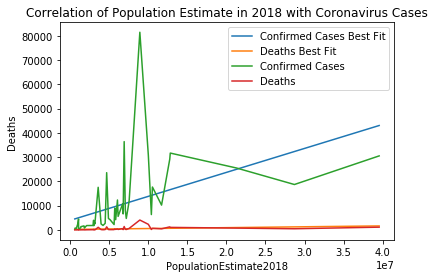

In [11]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['PopulationEstimate2018'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['PopulationEstimate2018'], result['Deaths'])
sns.lineplot(x = result['PopulationEstimate2018'], y = slope_Confirmed * result['PopulationEstimate2018'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['PopulationEstimate2018'], y = slope_Deaths * result['PopulationEstimate2018'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['PopulationEstimate2018'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['PopulationEstimate2018'], y = result['Deaths'], label = 'Deaths')
plt.title("Correlation of Population Estimate in 2018 with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(4.58596528266177, 0.1673421223991255)

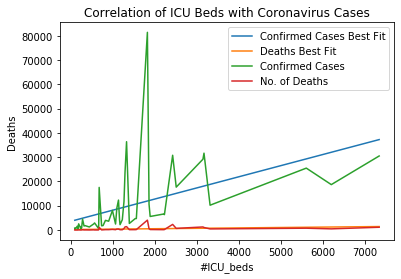

In [12]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['#ICU_beds'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['#ICU_beds'], result['Deaths'])
sns.lineplot(x = result['#ICU_beds'], y = slope_Confirmed * result['#ICU_beds'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['#ICU_beds'], y = slope_Deaths * result['#ICU_beds'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['#ICU_beds'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['#ICU_beds'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of ICU Beds with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(0.007120468778687342, 0.00026470700278135055)

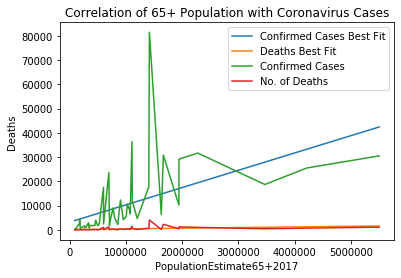

In [17]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['PopulationEstimate65+2017'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['PopulationEstimate65+2017'], result['Deaths'])
sns.lineplot(x = result['PopulationEstimate65+2017'], y = slope_Confirmed * result['PopulationEstimate65+2017'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['PopulationEstimate65+2017'], y = slope_Deaths * result['PopulationEstimate65+2017'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['PopulationEstimate65+2017'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['PopulationEstimate65+2017'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of 65+ Population with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(0.006066851873087898, 0.0002271005972763113)

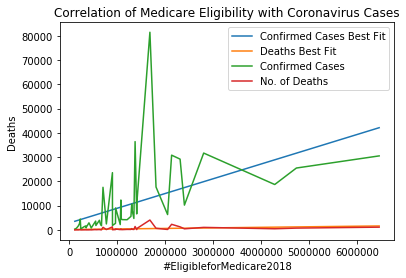

In [18]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['#EligibleforMedicare2018'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['#EligibleforMedicare2018'], result['Deaths'])
sns.lineplot(x = result['#EligibleforMedicare2018'], y = slope_Confirmed * result['#EligibleforMedicare2018'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['#EligibleforMedicare2018'], y = slope_Deaths * result['#EligibleforMedicare2018'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['#EligibleforMedicare2018'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['#EligibleforMedicare2018'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Medicare Eligibility with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(0.07065217392603139, 0.0026670615567051643)

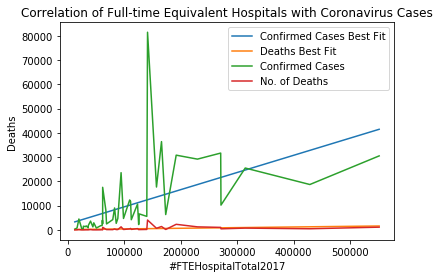

In [19]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['#FTEHospitalTotal2017'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['#FTEHospitalTotal2017'], result['Deaths'])
sns.lineplot(x = result['#FTEHospitalTotal2017'], y = slope_Confirmed * result['#FTEHospitalTotal2017'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['#FTEHospitalTotal2017'], y = slope_Deaths * result['#FTEHospitalTotal2017'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['#FTEHospitalTotal2017'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['#FTEHospitalTotal2017'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Full-time Equivalent Hospitals with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(0.002002251632744151, 7.373000812777658e-05)

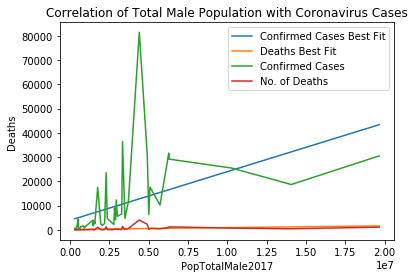

In [20]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['PopTotalMale2017'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['PopTotalMale2017'], result['Deaths'])
sns.lineplot(x = result['PopTotalMale2017'], y = slope_Confirmed * result['PopTotalMale2017'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['PopTotalMale2017'], y = slope_Deaths * result['PopTotalMale2017'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['PopTotalMale2017'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['PopTotalMale2017'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Total Male Population with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(0.001993684862009829, 7.359867593850486e-05)

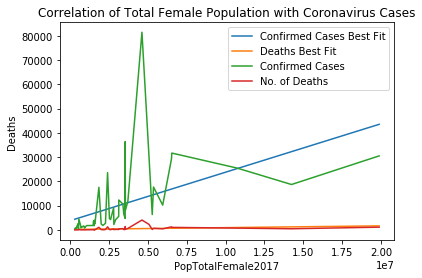

In [21]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result['PopTotalFemale2017'], result['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result['PopTotalFemale2017'], result['Deaths'])
sns.lineplot(x = result['PopTotalFemale2017'], y = slope_Confirmed * result['PopTotalFemale2017'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result['PopTotalFemale2017'], y = slope_Deaths * result['PopTotalFemale2017'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result['PopTotalFemale2017'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result['PopTotalFemale2017'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Total Female Population with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

the result table that takes the mean of columns when calculating value of states.

In [13]:
result_mean = pd.merge(states_pruned, counties_pruned_mean, on= 'State').iloc[:, 2:]
result_mean.head(5)

,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,lat,...,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,#ICU_beds
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4712,153,4559.0,100.492717,42538.0,620.0,3.247029,907.206961,13.157895,32.887935,...,90.216418,39.356716,16121.507463,14.407463,243.595522,51.450746,19.989231,77.282985,1318.940299,22.880597
Arizona,4724,180,4544.0,64.901548,51045.0,566.0,3.810330,701.291175,11.981372,33.678351,...,52.046667,38.653333,89781.800000,10.060000,148.826667,30.900000,16.483911,51.968667,6562.800000,103.933333
Arkansas,1744,38,1706.0,67.361213,24141.0,291.0,2.178899,932.435235,16.685780,34.911163,...,54.357333,40.316000,8938.026667,13.432000,235.172000,47.681333,20.388849,72.727067,773.666667,9.760000
California,30491,1140,29351.0,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079,37.851530,...,663.255172,38.503448,111499.913793,8.505172,153.908621,37.891379,12.091600,52.153621,9514.224138,126.517241
Colorado,9047,389,8658.0,159.648818,43307.0,1755.0,4.299768,764.221442,19.398696,38.933410,...,145.904687,41.265625,15078.859375,6.150000,130.337500,32.851562,14.297498,61.043125,1290.375000,17.109375


(26.45878911064943, 1.2370473043056227)

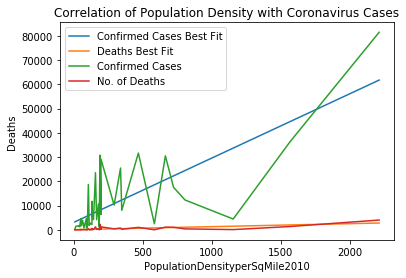

In [23]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['PopulationDensityperSqMile2010'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['PopulationDensityperSqMile2010'], result_mean['Deaths'])
sns.lineplot(x = result_mean['PopulationDensityperSqMile2010'], y = slope_Confirmed * result_mean['PopulationDensityperSqMile2010'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['PopulationDensityperSqMile2010'], y = slope_Deaths * result_mean['PopulationDensityperSqMile2010'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['PopulationDensityperSqMile2010'], y = result_mean['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['PopulationDensityperSqMile2010'], y = result_mean['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Population Density with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-955.9026662809905, -33.56334192349336)

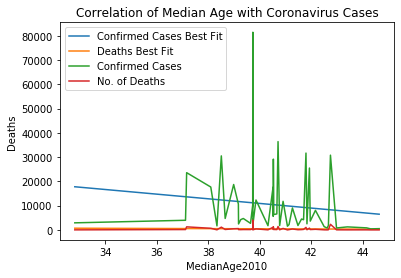

In [24]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['MedianAge2010'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['MedianAge2010'], result_mean['Deaths'])
sns.lineplot(x = result_mean['MedianAge2010'], y = slope_Confirmed * result_mean['MedianAge2010'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['MedianAge2010'], y = slope_Deaths * result_mean['MedianAge2010'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['MedianAge2010'], y = result_mean['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['MedianAge2010'], y = result_mean['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Median Age with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-349.7049759880407, -22.10229857348116)

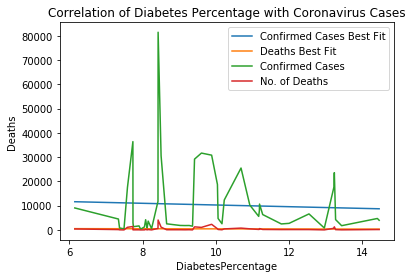

In [25]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['DiabetesPercentage'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['DiabetesPercentage'], result_mean['Deaths'])
sns.lineplot(x = result_mean['DiabetesPercentage'], y = slope_Confirmed * result_mean['DiabetesPercentage'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['DiabetesPercentage'], y = slope_Deaths * result_mean['DiabetesPercentage'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['DiabetesPercentage'], y = result_mean['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['DiabetesPercentage'], y = result_mean['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Diabetes Percentage with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-2.0720215541878217, 0.2558012632512276)

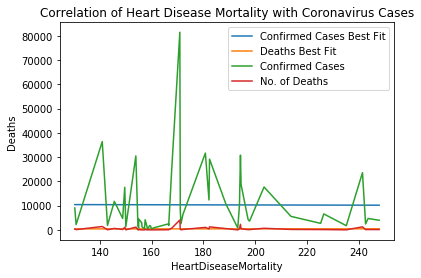

In [26]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['HeartDiseaseMortality'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['HeartDiseaseMortality'], result_mean['Deaths'])
sns.lineplot(x = result_mean['HeartDiseaseMortality'], y = slope_Confirmed * result_mean['HeartDiseaseMortality'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['HeartDiseaseMortality'], y = slope_Deaths * result_mean['HeartDiseaseMortality'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['HeartDiseaseMortality'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['HeartDiseaseMortality'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Heart Disease Mortality with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-223.41424237516966, -13.571989199214126)

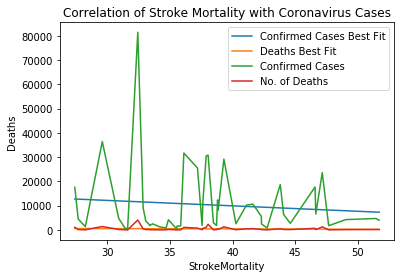

In [27]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['StrokeMortality'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['StrokeMortality'], result_mean['Deaths'])
sns.lineplot(x = result_mean['StrokeMortality'], y = slope_Confirmed * result_mean['StrokeMortality'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['StrokeMortality'], y = slope_Deaths * result_mean['StrokeMortality'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['StrokeMortality'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['StrokeMortality'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Stroke Mortality with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-870.2836540811658, -38.74617401796472)

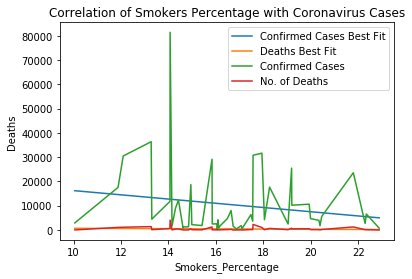

In [28]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['Smokers_Percentage'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['Smokers_Percentage'], result_mean['Deaths'])
sns.lineplot(x = result_mean['Smokers_Percentage'], y = slope_Confirmed * result_mean['Smokers_Percentage'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['Smokers_Percentage'], y = slope_Deaths * result_mean['Smokers_Percentage'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['Smokers_Percentage'], y = result['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['Smokers_Percentage'], y = result['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Smokers Percentage with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

(-471.20139420632984, -22.067827170074224)

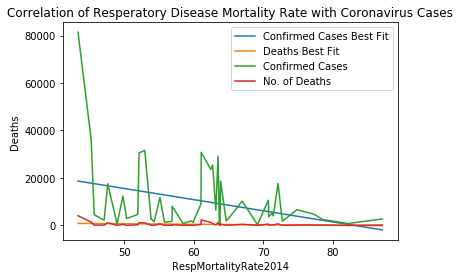

In [29]:
slope_Confirmed, intercept_Confirmed, r_value_Confirmed, p_value_Confirmed, std_err_Confirmed = stats.linregress(result_mean['RespMortalityRate2014'], result_mean['Confirmed'])
slope_Deaths, intercept_Deaths, r_value_Deaths, p_value_Deaths, std_err_Deaths = stats.linregress(result_mean['RespMortalityRate2014'], result_mean['Deaths'])
sns.lineplot(x = result_mean['RespMortalityRate2014'], y = slope_Confirmed * result_mean['RespMortalityRate2014'] + intercept_Confirmed, label = 'Confirmed Cases Best Fit')
sns.lineplot(x = result_mean['RespMortalityRate2014'], y = slope_Deaths * result_mean['RespMortalityRate2014'] + intercept_Deaths, label = 'Deaths Best Fit')
sns.lineplot(x = result_mean['RespMortalityRate2014'], y = result_mean['Confirmed'], label = 'Confirmed Cases')
sns.lineplot(x = result_mean['RespMortalityRate2014'], y = result_mean['Deaths'], label = 'No. of Deaths')
plt.title("Correlation of Resperatory Disease Mortality Rate with Coronavirus Cases", fontsize = 12)
slope_Confirmed, slope_Deaths

Import the time series death data and prune

In [14]:
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
deaths.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


In [15]:
Deaths_Prune = (deaths.iloc[5:3150, :].drop(['UID','iso2', 'iso3', 'code3', 'FIPS', 'Combined_Key', 'Country_Region', 'Lat', 'Long_', 'Population'], axis = 1))
Deaths_Prune.groupby(['Province_State']).sum()
Deaths_Prune.head(5)

,Admin2,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
5,Autauga,Alabama,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
6,Baldwin,Alabama,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
7,Barbour,Alabama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bibb,Alabama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blount,Alabama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_US.csv')
confirmed_cases.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [17]:
Confirmed_Cases_Prune = (confirmed_cases.iloc[5:3150, :].drop(['UID','iso2', 'iso3', 'code3', 'FIPS', 'Combined_Key', 'Country_Region', 'Lat', 'Long_'], axis = 1))
Confirmed_Cases_Prune = Confirmed_Cases_Prune.groupby(['Province_State']).sum()
Confirmed_Cases_Prune.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,2703,2947,3217,3563,3734,3953,4075,4345,4571,4712
Alaska,0,0,0,0,0,0,0,0,0,0,...,235,246,257,272,277,285,293,300,309,314
Arizona,0,0,0,0,1,1,1,1,1,1,...,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1106,1150,1209,1255,1374,1453,1521,1576,1652,1702
California,0,0,0,0,2,2,2,2,2,3,...,19706,21077,21702,22787,23931,25356,26686,27677,29157,30491


Regression using the two time series data.

In [36]:
#The Line Plot for US
Confirmed_Cases_Prune.columns[45]

'3/7/20'

In [37]:
us_series = Confirmed_Cases_Prune.sum(axis=0)

In [38]:
type(us_series)
len(us_series)

88

Diagram of confirmed cases and deaths in the United States

Text(0.5, 1.0, 'Number of Confirmed Cases in the U.S. since 1/22/20')

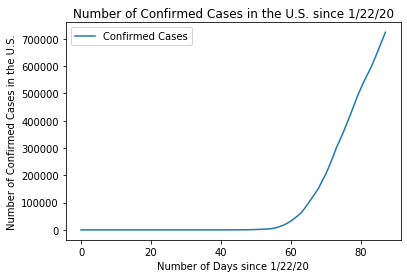

In [39]:
sns.lineplot(x = np.arange(0, 88), y = us_series, label = "Confirmed Cases")
plt.xlabel("Number of Days since 1/22/20")
plt.ylabel("Number of Confirmed Cases in the U.S.")
plt.title("Number of Confirmed Cases in the U.S. since 1/22/20")

Text(0.5, 1.0, 'Number of Confirmed Cases in the U.S. since 3/7/20')

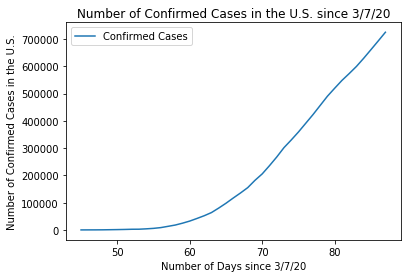

In [40]:
sns.lineplot(x = np.arange(45, 88), y = us_series[45:], label = "Confirmed Cases")
plt.xlabel("Number of Days since 3/7/20")
plt.ylabel("Number of Confirmed Cases in the U.S.")
plt.title("Number of Confirmed Cases in the U.S. since 3/7/20")

The function to get the confirmed graph for a certain state. Below we work on the analysis and prediction of respective states.

In [41]:
states = Confirmed_Cases_Prune.index.tolist()

In [42]:
def series_for_state(state, n = 100):
#     state: input the name of a state
#     n: number of days after 1/22/20, should be greater than 88, defualt 100 (1/5/20)
    if ((state not in states)):
        return 'No such state exists'  
    row_index = states.index(state)
    state_series = Confirmed_Cases_Prune.iloc[row_index].tolist()
    
    #plotting
    sns.lineplot(x = np.arange(0, 88), y = state_series, label = "Confirmed Cases")
    plt.xlabel("Number of Days since 1/22/20")
    plt.ylabel("Number of Confirmed cases in " + state)
    plt.title("Number of Confirmed cases in " + state + " Since 1/22/20")
    
    #Linear Regression
#     index = np.arange(46, 89)
#     data = {'index':index, "log_case":np.log(state_series[45:])}
    index = np.arange(61, 89)
    data = {'index':index, "log_case":(state_series[60:])}
    time_series = pd.DataFrame(data)
    time_series[time_series<0] = 0
    sns.lmplot(x='index', y='log_case', data=time_series, ci=False)
    plt.xlabel("Number of Days since 1/22/20")
    plt.ylabel("Confirmed cases in " + state)
    plt.title("Number of Confirmed cases in " + state + " Since 1/22/20")
    
    #Fit the Linear Regression using SKLearn
    from sklearn.linear_model import LinearRegression
    x = index.reshape(-1, 1)
    y = state_series[60:]
    reg = LinearRegression().fit(x, y)
    coef = reg.coef_[0]
    intercept = reg.intercept_
    score = reg.score(x, y)
    pred = int(coef * n + intercept)
    print("The predicted confirm cases in ", state, " is ", pred)
    # print out score to see accuracy
    print("The score of this linear regression: ", score)

    return

Below are example of a few examplary states, New York (the most serious outbreak), California (state taking the most proactive measure) and Washington (the first state had major outbreak in the United States)

The predicted confirm cases in  California  is  43114
The score of this linear regression:  0.9911688984655617


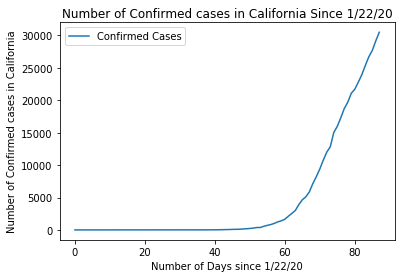

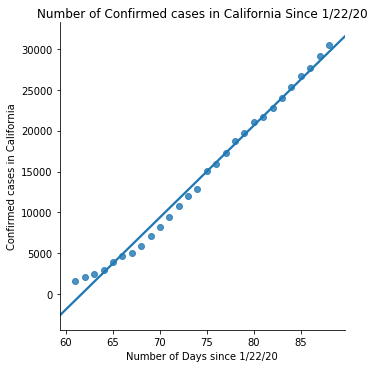

In [43]:
series_for_state('California')

The predicted confirm cases in  Washington  is  16396
The score of this linear regression:  0.9938589747136902


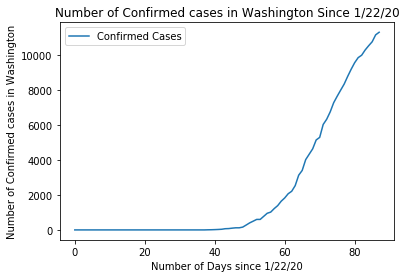

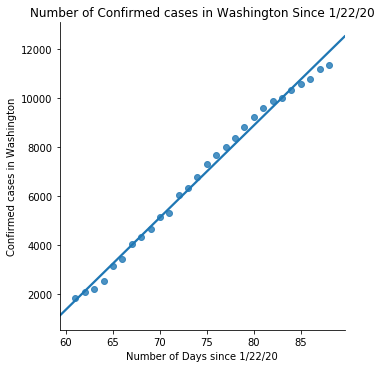

In [44]:
series_for_state('Washington')

The predicted confirm cases in  New York  is  342910
The score of this linear regression:  0.9959700227044012


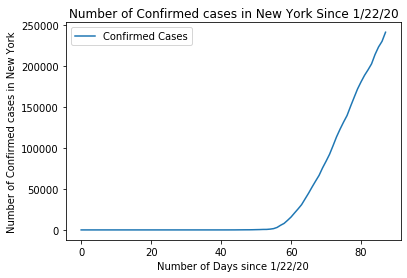

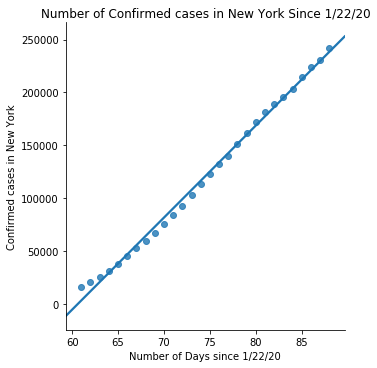

In [45]:
series_for_state('New York')

According to our observation of the plot for many states, we noticed that the number of confirmed cases tend to increase linearly since 3/22/20, so we directly bulit a linear model to predict the future to predict future number of confirmed cases. 

In [46]:
rows = Confirmed_Cases_Prune.values
rows

array([[   0,    0,    0, ..., 4345, 4571, 4712],
       [   0,    0,    0, ...,  300,  309,  314],
       [   0,    0,    0, ..., 4237, 4511, 4724],
       ...,
       [   0,    0,    0, ...,  728,  775,  785],
       [   0,    0,    0, ..., 3875, 4053, 4199],
       [   0,    0,    0, ...,  296,  305,  309]])

In [47]:
len(rows)

51

In [48]:
len(rows[1])
#88 days recorded

88

In [49]:
index = np.arange(1, 89)
index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

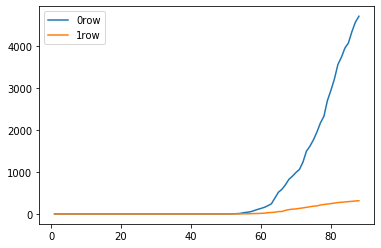

In [50]:
sns.lineplot(x = index, y = rows[0], label = "0row")
sns.lineplot(x = index, y = rows[1], label = "1row")

In [51]:
index = index[50:89]
index

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

comprehensive regression of data from all states.

Text(0.5, 1.0, 'Confirmed Cases of Each State in U.S. Since 1/12/20')

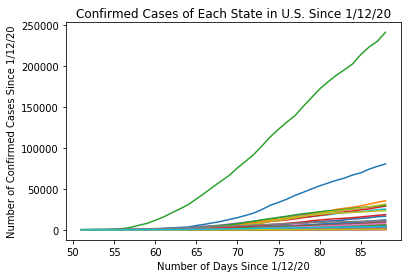

In [52]:
for i in np.arange(50):
    sns.lineplot(x = index, y = rows[i][50:89])
    
plt.xlabel("Number of Days Since 1/12/20")
plt.ylabel("Number of Confirmed Cases Since 1/12/20")
plt.title("Confirmed Cases of Each State in U.S. Since 1/12/20")

Text(0.5, 1.0, 'Confirmed Cases of Each State (Excluding NY and NJ) in U.S. Since 1/12/20')

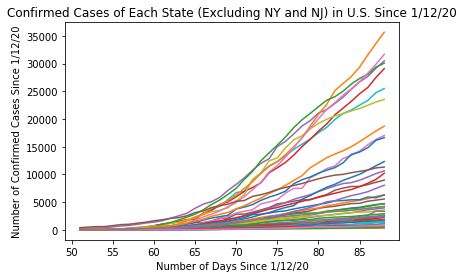

In [53]:
for i in np.arange(50):
    if (states[i] == "New York") or (states[i] == "New Jersey"):
        continue
    sns.lineplot(x = index, y = rows[i][50:89])
    
plt.xlabel("Number of Days Since 1/12/20")
plt.ylabel("Number of Confirmed Cases Since 1/12/20")
plt.title("Confirmed Cases of Each State (Excluding NY and NJ) in U.S. Since 1/12/20")

Use feature engineering to build model and make prediction on confirmed cases and deaths base on our feature selection in result table. Used trial and error on feature selection and confirmation in this process. 

Feature engineering on confirmed cases.

In [54]:
from sklearn.model_selection import train_test_split
tr, te = train_test_split(result, test_size=0.1)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
model.fit(tr[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']], tr['Confirmed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [58]:
Y_hat = model.predict(tr[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']])
Y = tr['Confirmed']
print("Training Error (RMSE):", rmse(Y, Y_hat))

Training Error (RMSE): 3371.9747100909312


In [59]:
model.fit(result[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']], result['Confirmed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Feature Engineering of deaths.

In [60]:
model.fit(tr[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']], tr['Deaths'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
Y_hat = model.predict(tr[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']])
Y = tr['Deaths']
print("Training Error (RMSE):", rmse(Y, Y_hat))

Training Error (RMSE): 216.43570344271387


In [62]:
model.fit(result[['People_Tested', 'People_Hospitalized', 'Incident_Rate', 'PopulationEstimate2018', '#ICU_beds', 'PopulationEstimate65+2017', '#EligibleforMedicare2018', '#FTEHospitalTotal2017', 'PopulationDensityperSqMile2010']], result['Deaths'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)